In [1]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import xlrd
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("C:\\Users\\skalk\\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

<AxesSubplot:>

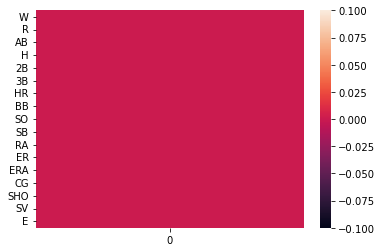

In [4]:
sns.heatmap(df.isnull().sum().to_frame())

In [5]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<function matplotlib.pyplot.show(close=None, block=None)>

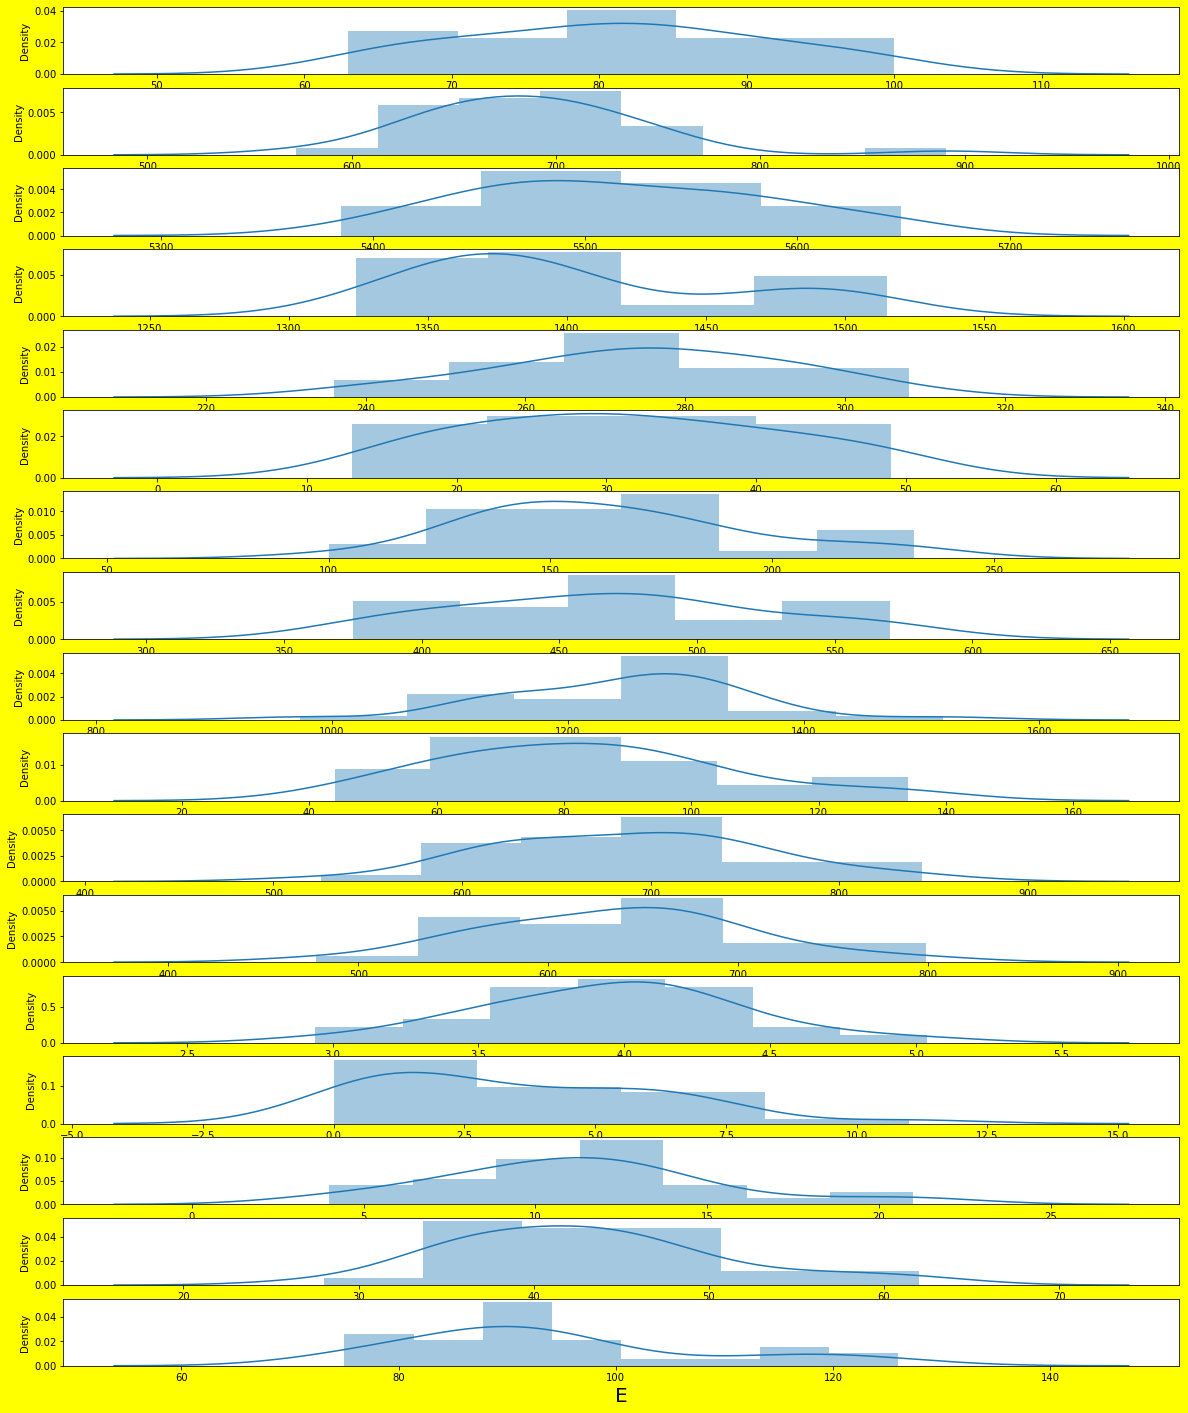

In [7]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(17,1,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show    

<function matplotlib.pyplot.show(close=None, block=None)>

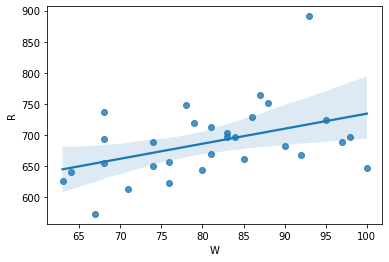

In [8]:
sns.regplot(x='W',y='R',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

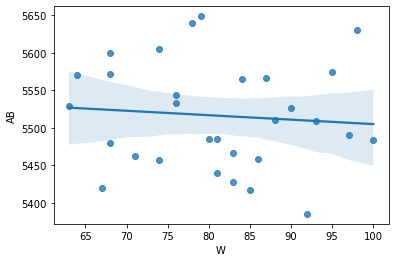

In [9]:
sns.regplot(x='W',y='AB',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

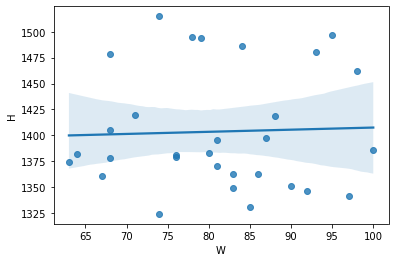

In [10]:
sns.regplot(x='W',y='H',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

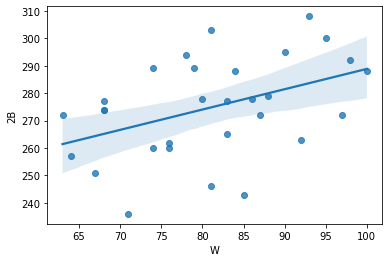

In [11]:
sns.regplot(x='W',y='2B',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

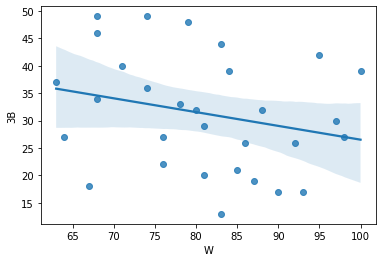

In [12]:
sns.regplot(x='W',y='3B',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

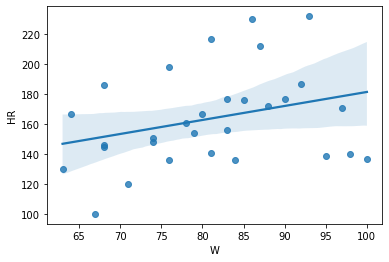

In [13]:
sns.regplot(x='W',y='HR',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

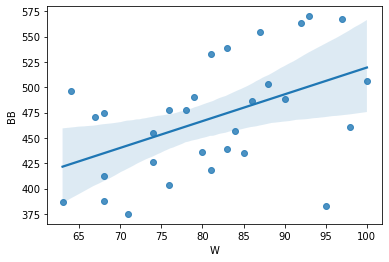

In [14]:
sns.regplot(x='W',y='BB',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

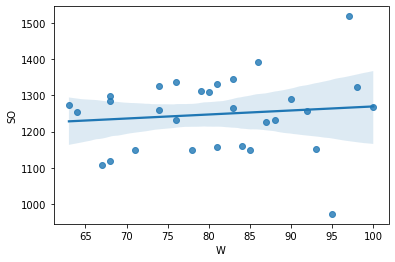

In [15]:
sns.regplot(x='W',y='SO',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

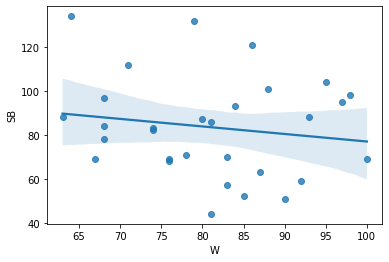

In [16]:
sns.regplot(x='W',y='SB',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

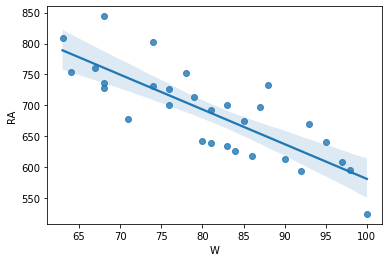

In [17]:
sns.regplot(x='W',y='RA',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

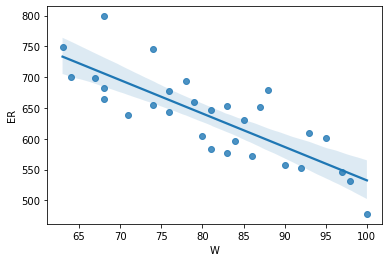

In [18]:
sns.regplot(x='W',y='ER',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

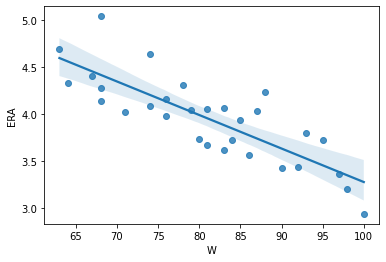

In [19]:
sns.regplot(x='W',y='ERA',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

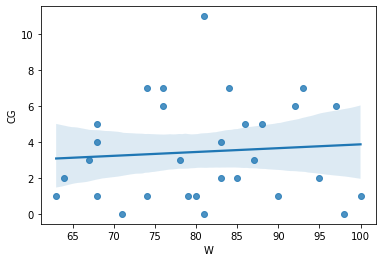

In [20]:
sns.regplot(x='W',y='CG',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

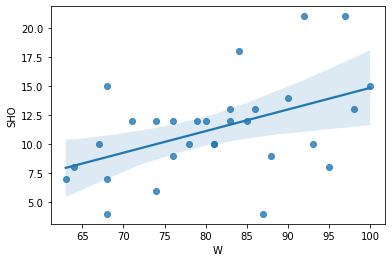

In [21]:
sns.regplot(x='W',y='SHO',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

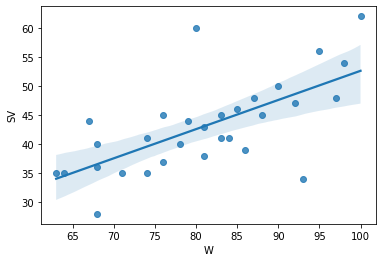

In [22]:
sns.regplot(x='W',y='SV',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

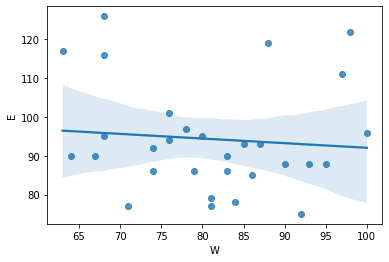

In [23]:
sns.regplot(x='W',y='E',data=df)
plt.show

In [ ]:
The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated.

Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.

The remaining features have less to no linear correlation with no of Wins

In [24]:
y=df['W']
x=df.drop(columns=['W'])

In [25]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25)
y_train.head()

15    100
20     90
11     86
13     76
22     71
Name: W, dtype: int64

In [27]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [28]:
regression.predict

<bound method LinearModel.predict of LinearRegression()>

In [29]:
regression.predict(scaler.transform([[737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95]]))

array([68.69139709])

In [32]:
pickle.dump(regression,open('reg_model','wb'))

In [38]:
regression.score(x_train,y_train)

0.9542194756679012

In [39]:
regression.score(x_test,y_test)

0.5541479614672149

In [41]:
y_pred=regression.predict(x_test)
y_pred

array([ 90.65071255,  68.69139709,  83.56449257,  75.37295127,
        85.57122545,  85.59250121, 100.86312963,  69.98000142])

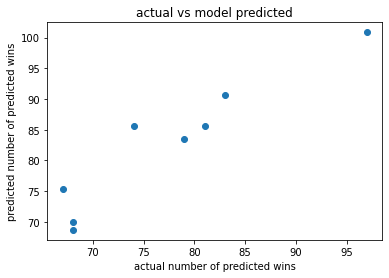

In [43]:
#lets plot and visualize
plt.scatter(y_test,y_pred)
plt.xlabel('actual number of predicted wins')
plt.ylabel('predicted number of predicted wins')
plt.title('actual vs model predicted')
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(y_test,y_pred)

5.410801399769749

In [47]:
mean_squared_error(y_test,y_pred)

40.50983756356477

In [49]:
print(cross_val_score(regression,x_scaled,y,cv=5).mean())

0.04075540667455883


In [51]:
#lets see if our model is overfitting our training data
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [53]:
lassCV=LassoCV(alphas=None,max_iter=100,normalize=True)
lassCV.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [54]:
alpha=lassCV.alpha_
alpha

0.1725181758550829

In [56]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1725181758550829)

In [57]:
lasso_reg.score(x_test,y_test)

0.8334034930783789